In [176]:
import pandas as pd
import random

# Génération des données
noms = [f"Personne_{i}" for i in range(1, 301)]
ages = [random.randint(18, 65) for _ in range(300)]
genres = [random.choice(["Homme", "Femme", "Xyz", "123", "Inconnu"]) for _ in range(300)]  # Ajout de valeurs aberrantes
achats = [random.choice(["oui", "non"]) for _ in range(300)]
professions = [random.choice(["Ingénieur", "Médecin", "Professeur", "Artiste", "Commerçant", "Étudiant"]) for _ in range(300)]
revenues = [random.randint(2000, 10000) if random.random() > 0.1 else None for _ in range(300)]

# Création du DataFrame
df = pd.DataFrame({"noms": noms, "age": ages, "genre": genres, "achat": achats, "profession": professions, "revenue": revenues})

# Affichage des premières lignes
print(df.head())

# Sauvegarde en CSV
df.to_csv("dataset.csv", index=False)


         noms  age    genre achat  profession  revenue
0  Personne_1   53  Inconnu   non     Artiste   4969.0
1  Personne_2   32  Inconnu   non     Artiste   5402.0
2  Personne_3   65      123   oui    Étudiant   3952.0
3  Personne_4   61      Xyz   non    Étudiant   3434.0
4  Personne_5   44      123   non  Commerçant   5592.0


In [177]:
df

,noms,age,genre,achat,profession,revenue
0,Personne_1,53,Inconnu,non,Artiste,4969.0
1,Personne_2,32,Inconnu,non,Artiste,5402.0
2,Personne_3,65,123,oui,Étudiant,3952.0
3,Personne_4,61,Xyz,non,Étudiant,3434.0
4,Personne_5,44,123,non,Commerçant,5592.0
...,...,...,...,...,...,...
295,Personne_296,45,Femme,non,Professeur,7040.0
296,Personne_297,26,Inconnu,non,Ingénieur,4756.0
297,Personne_298,55,Xyz,non,Commerçant,2324.0
298,Personne_299,42,Homme,non,Ingénieur,6676.0


In [178]:
print(df.info()) # Affichage des informations sur le dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   noms        300 non-null    object 
 1   age         300 non-null    int64  
 2   genre       300 non-null    object 
 3   achat       300 non-null    object 
 4   profession  300 non-null    object 
 5   revenue     285 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 14.2+ KB
None


In [179]:
df.describe() # Affichage des statistiques descriptives

,age,revenue
count,300.000000,285.000000
mean,42.510000,6095.856140
std,14.236766,2243.858414
min,18.000000,2004.000000
25%,29.000000,4335.000000
50%,44.000000,6106.000000
75%,55.000000,8039.000000
max,65.000000,9997.000000


In [180]:
df.isna().sum() # Affichage des valeurs manquantes par colonne

noms           0
age            0
genre          0
achat          0
profession     0
revenue       15
dtype: int64

In [181]:
# Remplacer les valeurs manquantes par la moyenne de la colonne revenue

df.fillna(df.revenue.mean(), inplace=True)


In [182]:
df.isna().sum()

noms          0
age           0
genre         0
achat         0
profession    0
revenue       0
dtype: int64

In [183]:
# Définition des valeurs aberrantes
valeurs_aberrantes = ["Xyz", "123", "Inconnu"]

In [184]:
# Comptage des valeurs aberrantes
nb_aberrantes = df["genre"].isin(valeurs_aberrantes).sum()
nb_aberrantes

171

In [185]:
import numpy as np

In [186]:
# Génération aléatoire de valeurs respectant la répartition 55% Homme, 45% Femme
remplacement = np.random.choice(["Homme", "Femme"], size=nb_aberrantes, p=[0.55, 0.45])

In [187]:
# Remplacement des valeurs aberrantes
df.loc[df["genre"].isin(valeurs_aberrantes), "genre"] = remplacement

print(df)

             noms  age  genre achat  profession  revenue
0      Personne_1   53  Femme   non     Artiste   4969.0
1      Personne_2   32  Homme   non     Artiste   5402.0
2      Personne_3   65  Femme   oui    Étudiant   3952.0
3      Personne_4   61  Femme   non    Étudiant   3434.0
4      Personne_5   44  Femme   non  Commerçant   5592.0
..            ...  ...    ...   ...         ...      ...
295  Personne_296   45  Femme   non  Professeur   7040.0
296  Personne_297   26  Femme   non   Ingénieur   4756.0
297  Personne_298   55  Homme   non  Commerçant   2324.0
298  Personne_299   42  Homme   non   Ingénieur   6676.0
299  Personne_300   55  Femme   oui   Ingénieur   6195.0

[300 rows x 6 columns]


In [188]:
# Sauvegarde de la nouvelle version du jeu de donnees en CSV
df.to_csv("dataset_updated.csv", index=False)

In [189]:
# chargement du jeu de donnees
data = pd.read_csv('dataset_updated.csv')
data

,noms,age,genre,achat,profession,revenue
0,Personne_1,53,Femme,non,Artiste,4969.0
1,Personne_2,32,Homme,non,Artiste,5402.0
2,Personne_3,65,Femme,oui,Étudiant,3952.0
3,Personne_4,61,Femme,non,Étudiant,3434.0
4,Personne_5,44,Femme,non,Commerçant,5592.0
...,...,...,...,...,...,...
295,Personne_296,45,Femme,non,Professeur,7040.0
296,Personne_297,26,Femme,non,Ingénieur,4756.0
297,Personne_298,55,Homme,non,Commerçant,2324.0
298,Personne_299,42,Homme,non,Ingénieur,6676.0


In [190]:
# suppression de la colonne 'noms'

data.drop(columns=['noms'], inplace=True)

In [191]:
data

,age,genre,achat,profession,revenue
0,53,Femme,non,Artiste,4969.0
1,32,Homme,non,Artiste,5402.0
2,65,Femme,oui,Étudiant,3952.0
3,61,Femme,non,Étudiant,3434.0
4,44,Femme,non,Commerçant,5592.0
...,...,...,...,...,...
295,45,Femme,non,Professeur,7040.0
296,26,Femme,non,Ingénieur,4756.0
297,55,Homme,non,Commerçant,2324.0
298,42,Homme,non,Ingénieur,6676.0


In [192]:
# Encodage des variables categorielles

data = pd.get_dummies(data, columns=['genre', 'achat', 'profession'], drop_first=True)

In [193]:
data

,age,revenue,genre_Homme,achat_oui,profession_Commerçant,profession_Ingénieur,profession_Médecin,profession_Professeur,profession_Étudiant
0,53,4969.0,0,0,0,0,0,0,0
1,32,5402.0,1,0,0,0,0,0,0
2,65,3952.0,0,1,0,0,0,0,1
3,61,3434.0,0,0,0,0,0,0,1
4,44,5592.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
295,45,7040.0,0,0,0,0,0,1,0
296,26,4756.0,0,0,0,1,0,0,0
297,55,2324.0,1,0,1,0,0,0,0
298,42,6676.0,1,0,0,1,0,0,0


In [194]:
# Normaliser les variables 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [195]:
data[['age', 'revenue']] = scaler.fit_transform(data[['age', 'revenue']])

In [196]:
data

,age,revenue,genre_Homme,achat_oui,profession_Commerçant,profession_Ingénieur,profession_Médecin,profession_Professeur,profession_Étudiant
0,0.744681,0.370950,0,0,0,0,0,0,0
1,0.297872,0.425122,1,0,0,0,0,0,0
2,1.000000,0.243713,0,1,0,0,0,0,1
3,0.914894,0.178907,0,0,0,0,0,0,1
4,0.553191,0.448893,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
295,0.574468,0.630051,0,0,0,0,0,1,0
296,0.170213,0.344301,0,0,0,1,0,0,0
297,0.787234,0.040035,1,0,1,0,0,0,0
298,0.510638,0.584511,1,0,0,1,0,0,0


In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

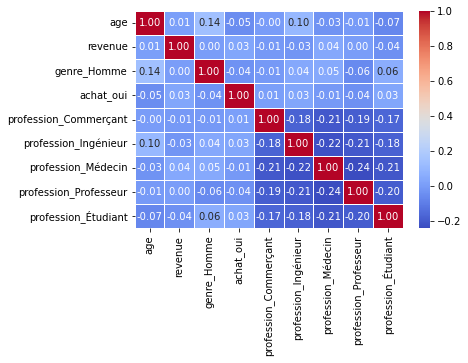

In [198]:
# Verifier si une reduction de dimension est necessaire
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [205]:
# Faire une binarisation de la variable 'revenue'

from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.2)
data['revenue_binaire'] = binarizer.fit_transform(data[['revenue']])

In [206]:
data

,age,revenue,genre_Homme,achat_oui,profession_Commerçant,profession_Ingénieur,profession_Médecin,profession_Professeur,profession_Étudiant,revenue_binaire
0,0.744681,0.370950,0,0,0,0,0,0,0,1.0
1,0.297872,0.425122,1,0,0,0,0,0,0,1.0
2,1.000000,0.243713,0,1,0,0,0,0,1,1.0
3,0.914894,0.178907,0,0,0,0,0,0,1,0.0
4,0.553191,0.448893,0,0,1,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
295,0.574468,0.630051,0,0,0,0,0,1,0,1.0
296,0.170213,0.344301,0,0,0,1,0,0,0,1.0
297,0.787234,0.040035,1,0,1,0,0,0,0,0.0
298,0.510638,0.584511,1,0,0,1,0,0,0,1.0
